In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data = pd.read_csv('Данные.csv')
data

,дата,направление,выход
0,30.12.2021,ш,"78,95"
1,29.12.2021,ш,"79,3"
2,28.12.2021,ш,"79,21"
3,27.12.2021,ш,"79,06"
4,24.12.2021,л,"78,69"
...,...,...,...
744,10.01.2019,ш,"60,58"
745,09.01.2019,ш,"61,67"
746,08.01.2019,л,"61,49"
747,04.01.2019,л,"58,73"


In [11]:
data['дата'] = pd.to_datetime(data['дата'], dayfirst=True)

sorted_data = data.sort_values(by='дата', ascending=True)
sorted_data = sorted_data.reset_index(drop=True)

sorted_data

,дата,направление,выход
0,2019-01-03,л,"57,3"
1,2019-01-04,л,"58,73"
2,2019-01-08,л,"61,49"
3,2019-01-09,ш,"61,67"
4,2019-01-10,ш,"60,58"
...,...,...,...
744,2021-12-24,л,"78,69"
745,2021-12-27,ш,"79,06"
746,2021-12-28,ш,"79,21"
747,2021-12-29,ш,"79,3"


In [13]:
sorted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   дата         749 non-null    datetime64[ns]
 1   направление  749 non-null    object        
 2   выход        749 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 17.7+ KB


In [15]:
sorted_data['выход'] = sorted_data['выход'].apply(lambda x: float(str(x).replace(',', '.')))

sorted_data['выход'].dtypes

dtype('float64')

In [17]:
sorted_data.head(20)

,дата,направление,выход
0,2019-01-03,л,57.30
1,2019-01-04,л,58.73
2,2019-01-08,л,61.49
3,2019-01-09,ш,61.67
4,2019-01-10,ш,60.58
5,2019-01-11,ш,59.16
6,2019-01-14,л,60.66
7,2019-01-15,л,61.41
8,2019-01-16,ш,61.26
9,2019-01-17,ш,62.75


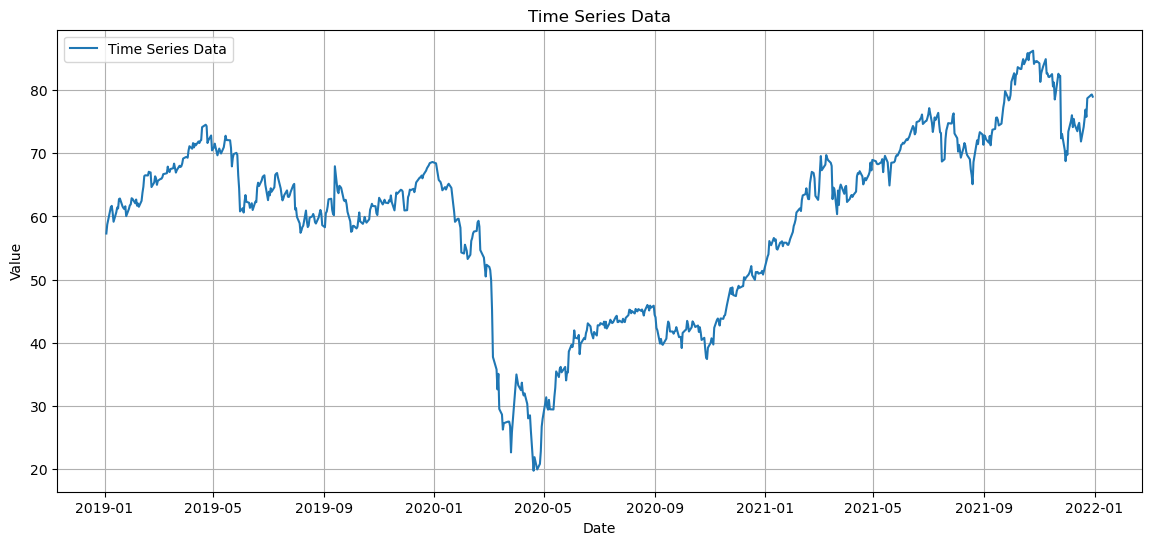

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], sorted_data['выход'], label='Time Series Data')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

# Частотное разложение

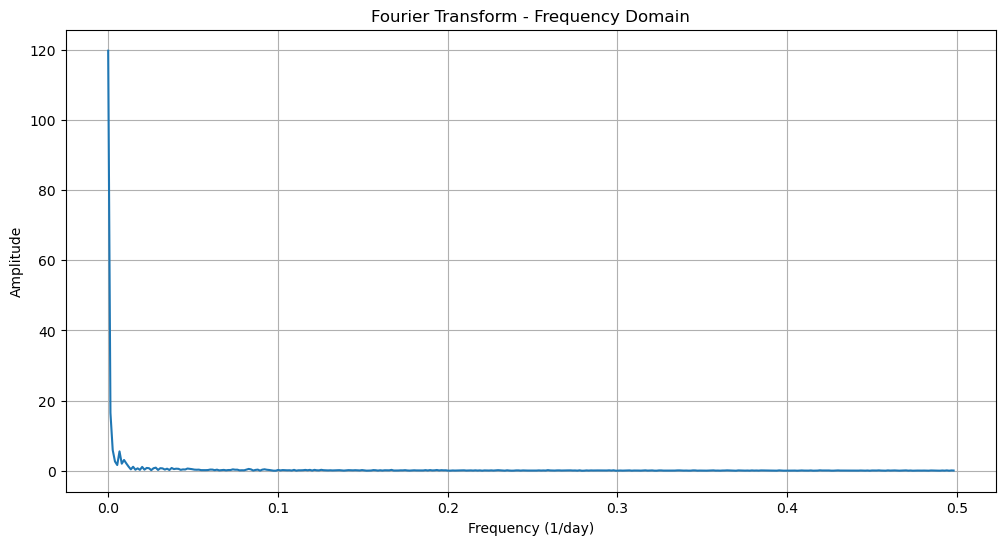

In [21]:
from scipy.fft import fft, fftfreq

values = sorted_data['выход'].values

N = len(values)

T = 1.0

yf = fft(values)
xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Fourier Transform - Frequency Domain")
plt.xlabel("Frequency (1/day)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Амплитуды компонент ряда с разными периодами

C:\Users\Arthas\AppData\Local\Temp\ipykernel_91576\761235077.py:1: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / xf


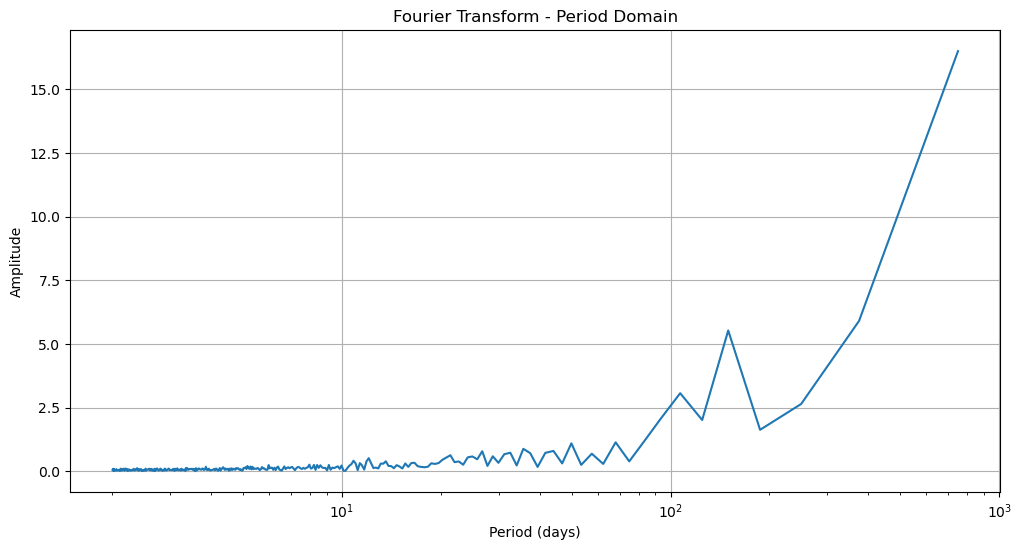

In [24]:
periods = 1 / xf

periods = periods[xf > 0]
amplitudes = 2.0/N * np.abs(yf[:N//2])[xf > 0]

plt.figure(figsize=(12, 6))
plt.plot(periods, amplitudes)
plt.title("Fourier Transform - Period Domain")
plt.xlabel("Period (days)")
plt.ylabel("Amplitude")
plt.xscale('log')
plt.grid(True)
plt.show()

In [26]:
# Топ 5 периодов по амплитуде:
top_5_indices = np.argsort(amplitudes)[-5:]
top_5_periods = periods[top_5_indices]
top_5_amplitudes = amplitudes[top_5_indices]

top_5_periods, top_5_amplitudes

(array([249.66666667, 107.        , 149.8       , 374.5       ,
        749.        ]),
 array([ 2.64157618,  3.06503341,  5.52790131,  5.9029142 , 16.49803223]))

# Тренд с помощью сглаживания

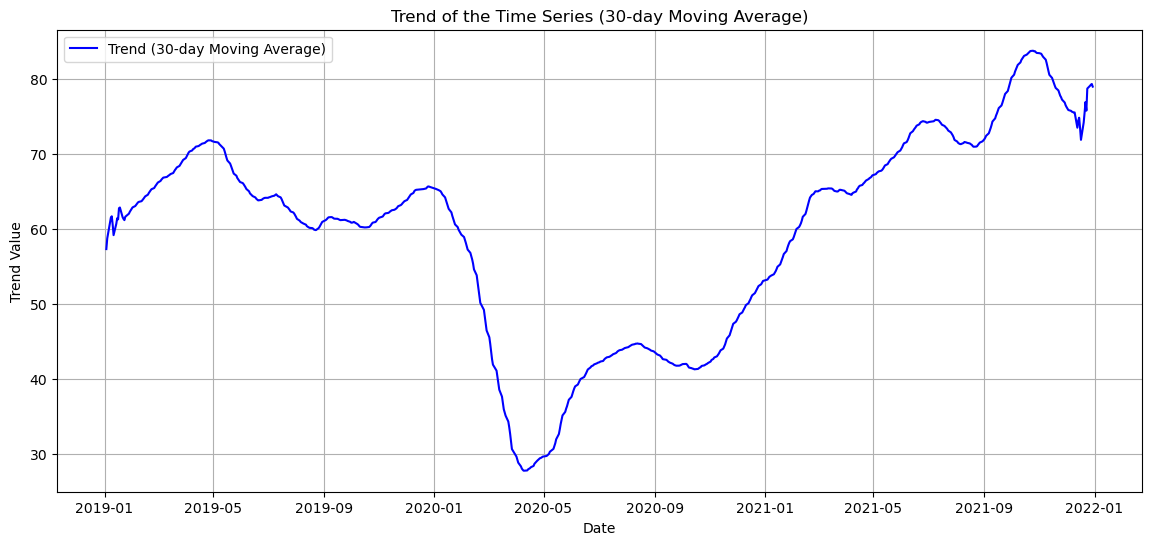

In [28]:
smoothed_data = sorted_data['выход'].rolling(window=30, center=True).mean()

# Замена NaN на изначальные значения
smoothed_data = smoothed_data.fillna(sorted_data['выход'])

plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], smoothed_data, label='Trend (30-day Moving Average)', color='blue')
plt.title('Trend of the Time Series (30-day Moving Average)')
plt.xlabel('Date')
plt.ylabel('Trend Value')
plt.grid(True)
plt.legend()
plt.show()

In [31]:
smoothed_data.head(35)

0     57.300000
1     58.730000
2     61.490000
3     61.670000
4     60.580000
5     59.160000
6     60.660000
7     61.410000
8     61.260000
9     62.750000
10    62.840000
11    61.560000
12    61.320000
13    61.160000
14    61.610000
15    61.713333
16    62.020333
17    62.278667
18    62.464667
19    62.640667
20    62.853667
21    63.036667
22    63.194000
23    63.358667
24    63.517667
25    63.592667
26    63.685667
27    63.831667
28    63.986333
29    64.154333
30    64.323667
31    64.550000
32    64.772667
33    64.953333
34    65.124333
Name: выход, dtype: float64

# Выделение тренда из ряда

In [35]:
# Проверка на наличие NaN
has_nan = np.isnan(smoothed_data).any()

print(has_nan)

False


### Тренд для сглаженного ряда

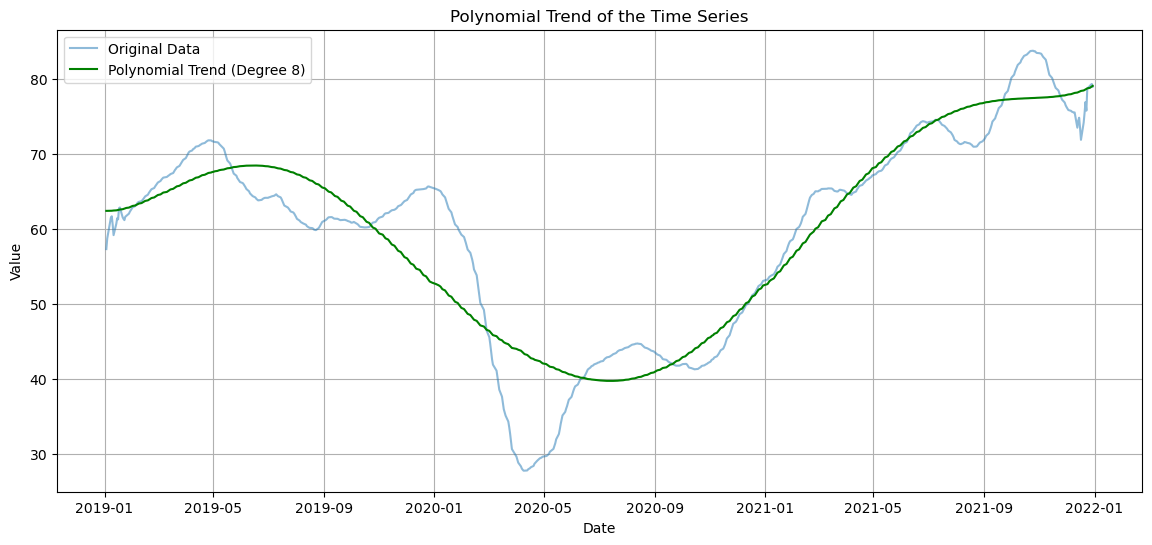

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.arange(len(smoothed_data)).reshape(-1, 1)
y = smoothed_data.values

model = LinearRegression()

#Создание полиномиальной модели
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)

#Обучение полиномиальной регрессии
model_poly_smth = LinearRegression().fit(X_poly, y)

#Прогнозирование тренда
trend_poly_smth = model_poly_smth.predict(X_poly)

plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], smoothed_data, label='Original Data', alpha=0.5)
plt.plot(sorted_data['дата'], trend_poly_smth, label='Polynomial Trend (Degree 8)', color='green')
plt.title('Polynomial Trend of the Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

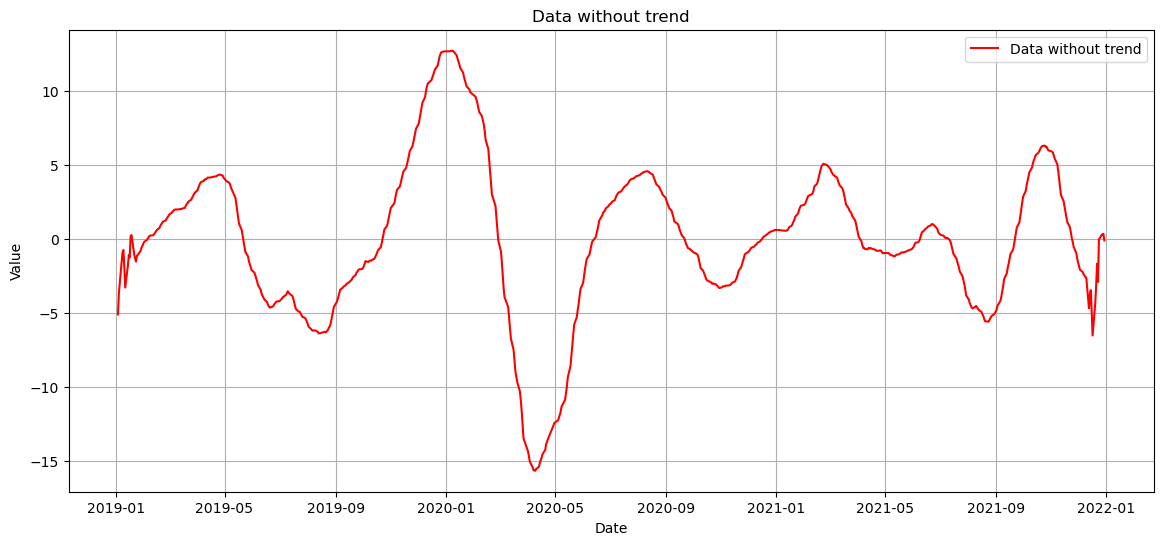

In [39]:
data_without_trend_smth = smoothed_data - trend_poly_smth
plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], data_without_trend_smth, label='Data without trend', color='red')
plt.title('Data without trend')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

### Тренд для несглаженного ряда

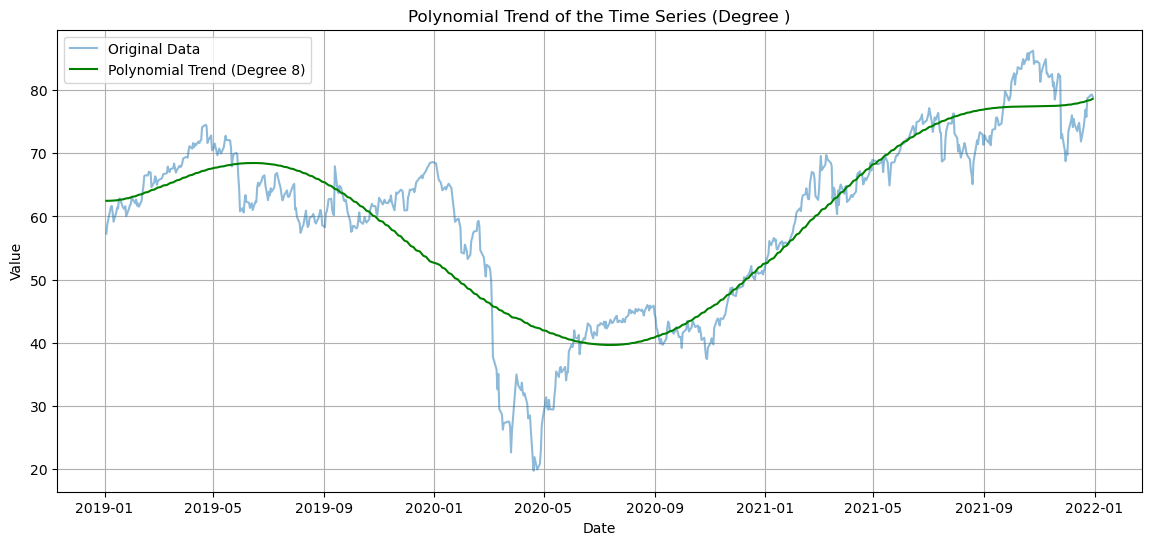

In [41]:
X = np.arange(len(sorted_data['выход'])).reshape(-1, 1)
y = sorted_data['выход'].values

model = LinearRegression()

poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)

model_poly = LinearRegression().fit(X_poly, y)

trend_poly = model_poly.predict(X_poly)

plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], sorted_data['выход'], label='Original Data', alpha=0.5)
plt.plot(sorted_data['дата'], trend_poly, label='Polynomial Trend (Degree 8)', color='green')
plt.title('Polynomial Trend of the Time Series (Degree )')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

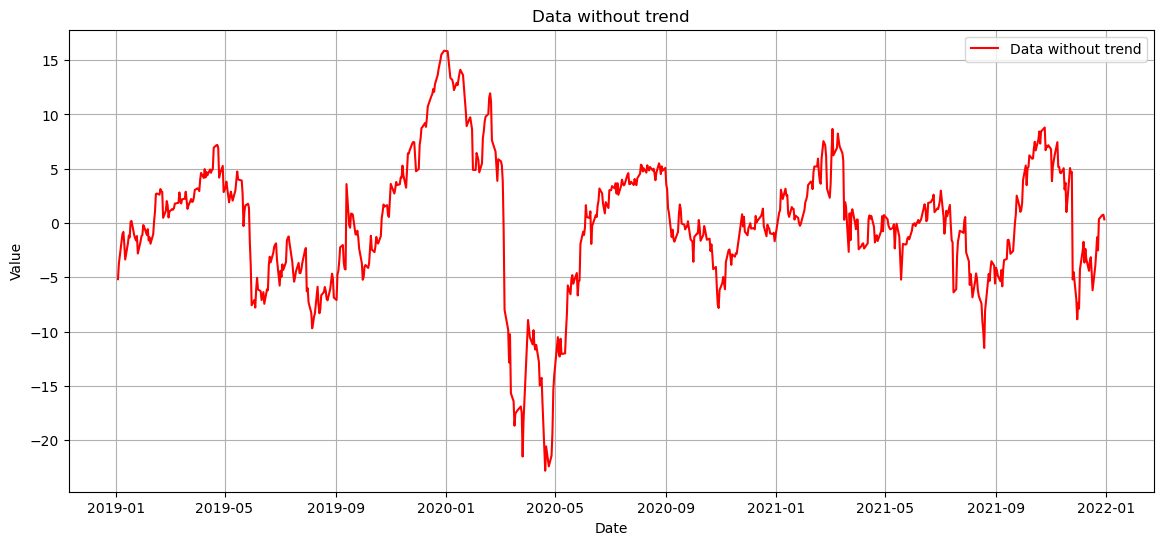

In [42]:
data_without_trend = sorted_data['выход'] - trend_poly
plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], data_without_trend, label='Data without trend', color='red')
plt.title('Data without trend')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

# Выделение сезонной компоненты

### Для сглаженного ряда

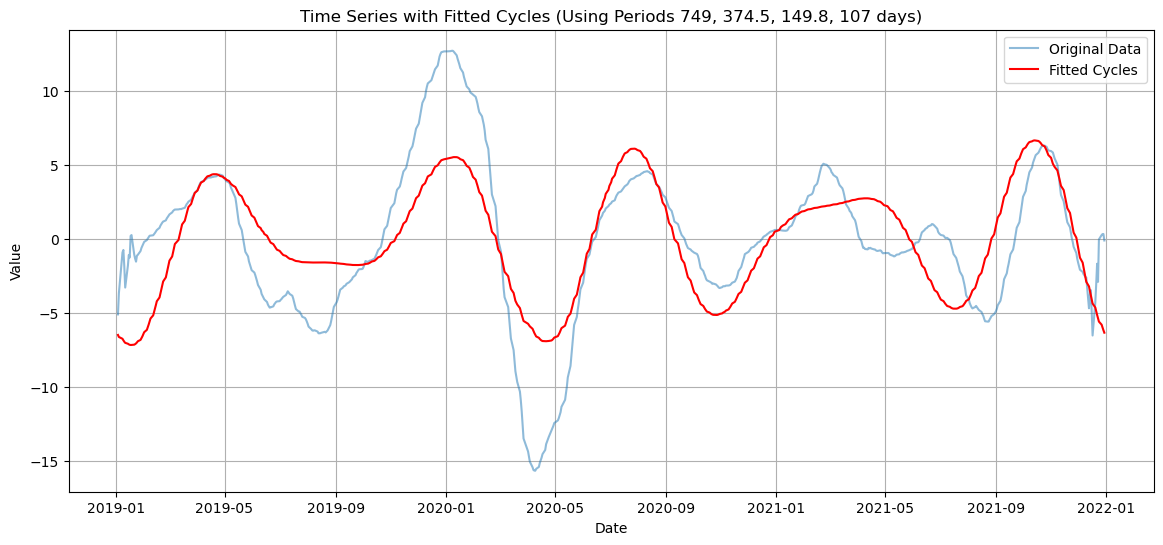

In [45]:
P1 = 749  #Периоды в днях
P2 = 374.5 
P3 = 149.8
P4 = 107
t = np.arange(len(data_without_trend_smth))

#Генерация синусоидальных компонентов для четырёх периодов
X_sin_cos = np.column_stack([
    np.sin(2 * np.pi * t / P1), np.cos(2 * np.pi * t / P1),
    np.sin(2 * np.pi * t / P2), np.cos(2 * np.pi * t / P2),
    np.sin(2 * np.pi * t / P3), np.cos(2 * np.pi * t / P3),
    np.sin(2 * np.pi * t / P4), np.cos(2 * np.pi * t / P4),
])

#Обучение линейной модели, которая включает синусоидальные компоненты
cycles_smth = LinearRegression().fit(X_sin_cos, data_without_trend_smth)

#Прогнозирование на основе синусоидальных компонентов
model_cycles_smth = cycles_smth.predict(X_sin_cos)

plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], data_without_trend_smth, label='Original Data', alpha=0.5)
plt.plot(sorted_data['дата'], model_cycles_smth, label='Fitted Cycles', color='red')
plt.title(f'Time Series with Fitted Cycles (Using Periods {P1}, {P2}, {P3}, {P4} days)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


### Для несглаженного ряда

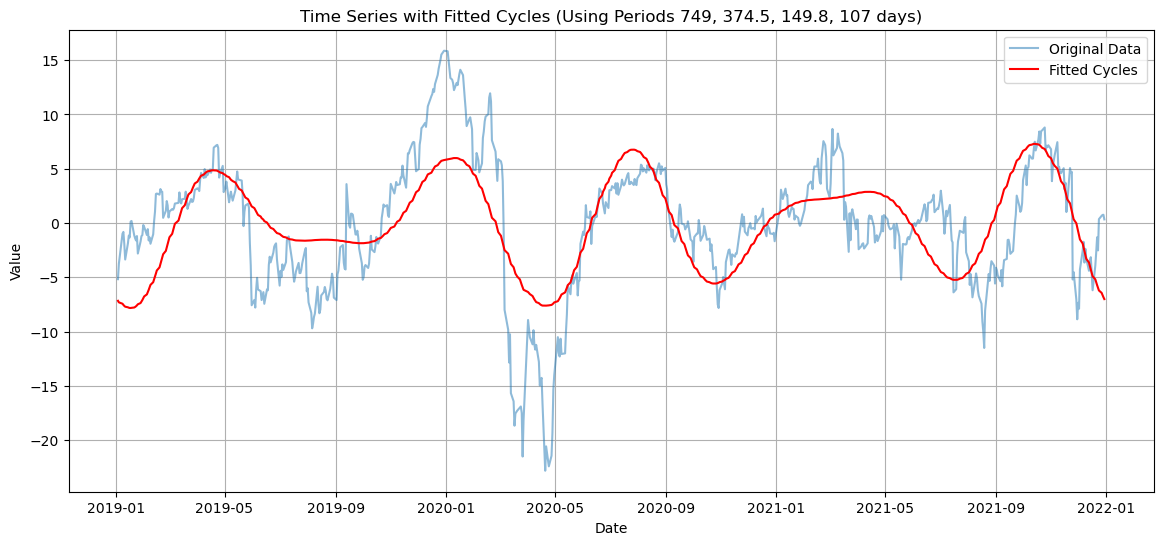

In [48]:
cycles = LinearRegression().fit(X_sin_cos, data_without_trend)

model_cycles = cycles.predict(X_sin_cos)

plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], data_without_trend, label='Original Data', alpha=0.5)
plt.plot(sorted_data['дата'], model_cycles, label='Fitted Cycles', color='red')
plt.title(f'Time Series with Fitted Cycles (Using Periods {P1}, {P2}, {P3}, {P4} days)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


# Выделение из ряда тренда и сезонной компоненты

### Для сглаженного ряда

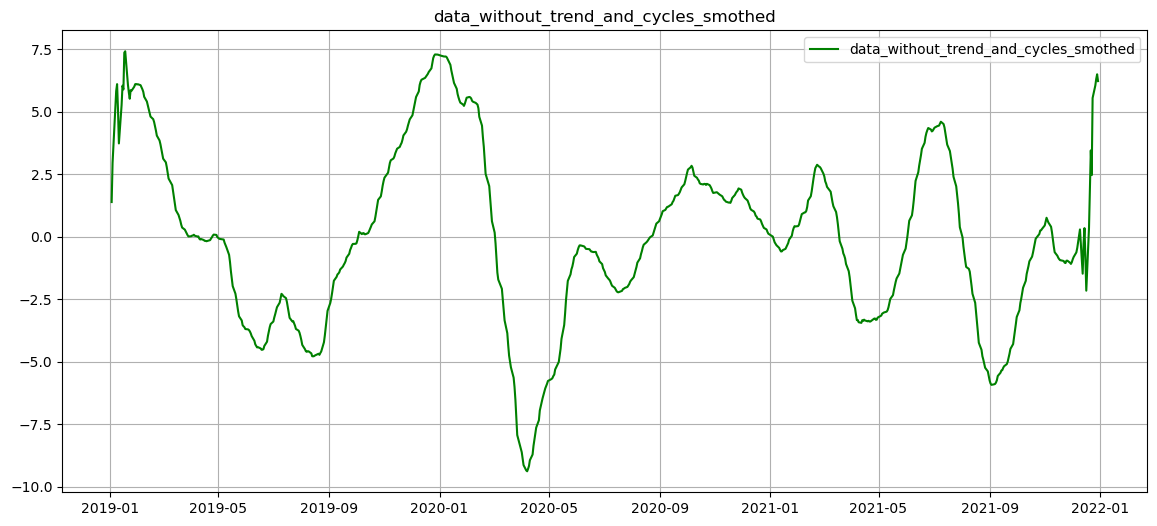

In [53]:
data_without_trend_and_cycles_smth = data_without_trend_smth - model_cycles_smth

plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], data_without_trend_and_cycles_smth, label='data_without_trend_and_cycles_smothed', color='green')
plt.title('data_without_trend_and_cycles_smothed')
plt.grid(True)
plt.legend()

### Для несглаженного ряда

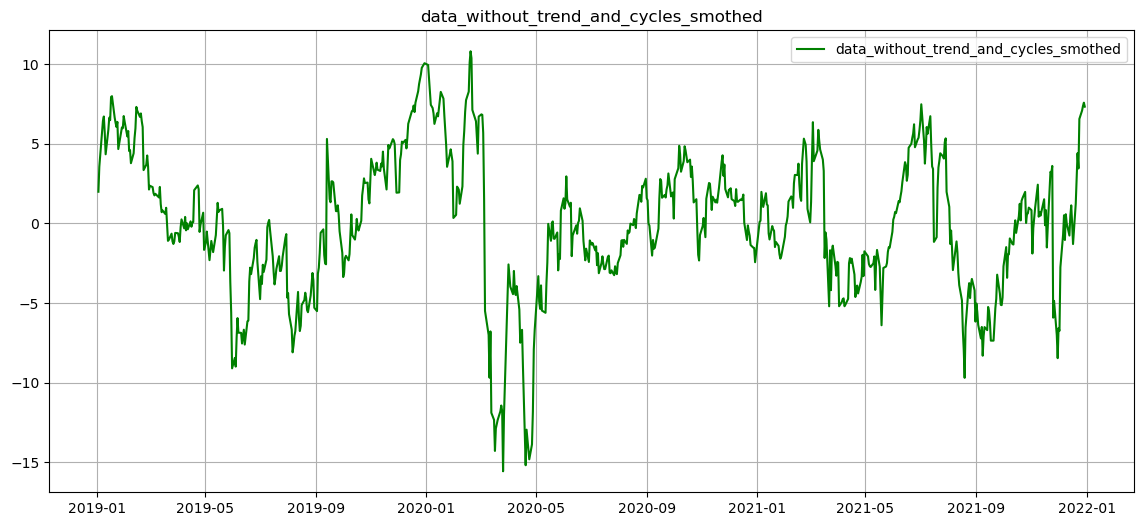

In [56]:
data_without_trend_and_cycles = data_without_trend - model_cycles

plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], data_without_trend_and_cycles, label='data_without_trend_and_cycles_smothed', color='green')
plt.title('data_without_trend_and_cycles_smothed')
plt.grid(True)
plt.legend()

# Автокорреляционная функция

### Для сглаженного ряда

<Figure size 2500x3000 with 0 Axes>

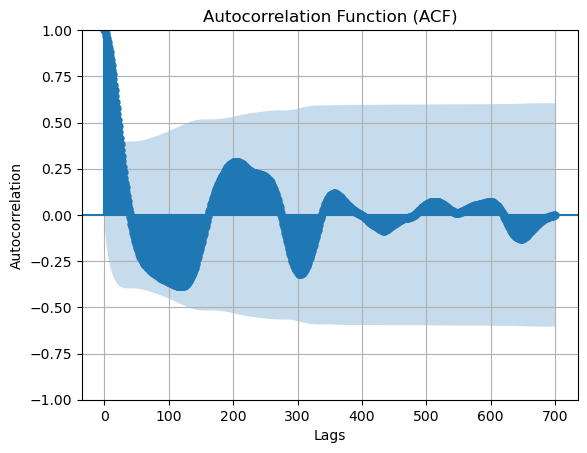

In [61]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(25, 30))
plot_acf(data_without_trend_and_cycles_smth, lags=700, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

### Для несглаженного ряда

<Figure size 2500x3000 with 0 Axes>

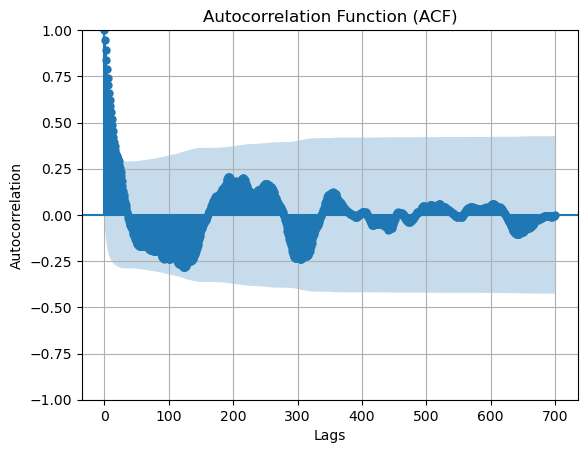

In [63]:
plt.figure(figsize=(25, 30))
plot_acf(data_without_trend_and_cycles, lags=700, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

## Тест Дики-Фулера

### Для сглаженного ряда

In [68]:
from statsmodels.tsa.stattools import adfuller

result_smth = adfuller(data_without_trend_and_cycles_smth)

print('ADF Statistic:', result_smth[0])
print('p-value:', result_smth[1])
print('Critical Values:')
for key, value in result_smth[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -4.345928872432557
p-value: 0.0003695315457184851
Critical Values:
   1%: -3.4393644334758475
   5%: -2.8655182850048306
   10%: -2.568888486973192


### Для несглаженного ряда

In [73]:
result = adfuller(data_without_trend_and_cycles)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -4.284298250721213
p-value: 0.0004728611506079875
Critical Values:
   1%: -3.43912257105195
   5%: -2.8654117005229844
   10%: -2.568831705010152


# Прогноз

## Прогноз тренда для сглаженного ряда

In [77]:
dates_for_forecast = pd.read_csv('Данные_2.csv')

dates_for_forecast['дата'] = pd.to_datetime(dates_for_forecast['дата'], dayfirst=True)

future_dates = dates_for_forecast['дата']

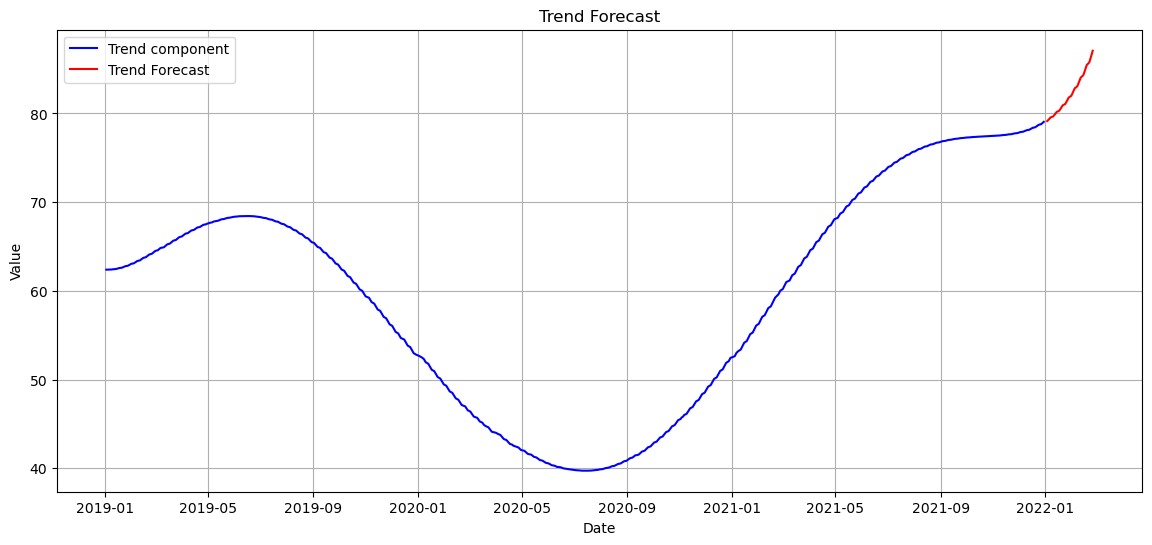

In [79]:
future_X = np.arange(len(data_without_trend_and_cycles) + len(future_dates)).reshape(-1, 1)
future_X_poly = poly.transform(future_X)
future_trend_smth = model_poly_smth.predict(future_X_poly)

forecast_df_trend_smth = pd.DataFrame({
    'дата': future_dates,
    'forecast': future_trend_smth[-len(future_dates):]# Только последние прогнозы, соответствующие будущим датам
})

plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], trend_poly_smth, label='Trend component', color='blue')
plt.plot(forecast_df_trend_smth['дата'], forecast_df_trend_smth['forecast'], label='Trend Forecast', color='red')
plt.title('Trend Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


## Прогноз тренда для несглаженного ряда

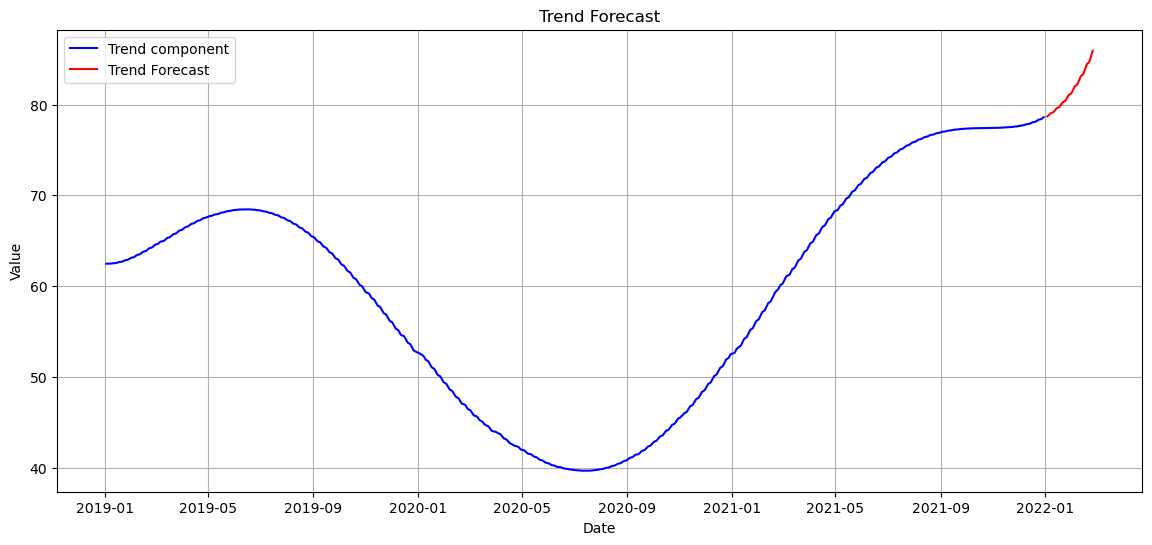

In [82]:
future_trend = model_poly.predict(future_X_poly)

forecast_df_trend = pd.DataFrame({
    'дата': future_dates,
    'forecast': future_trend[-len(future_dates):]# Только последние прогнозы, соответствующие будущим датам
})

plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], trend_poly, label='Trend component', color='blue')
plt.plot(forecast_df_trend['дата'], forecast_df_trend['forecast'], label='Trend Forecast', color='red')
plt.title('Trend Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


## Прогноз сезонной компоненты

## Прогноз тренда для сглаженного ряда

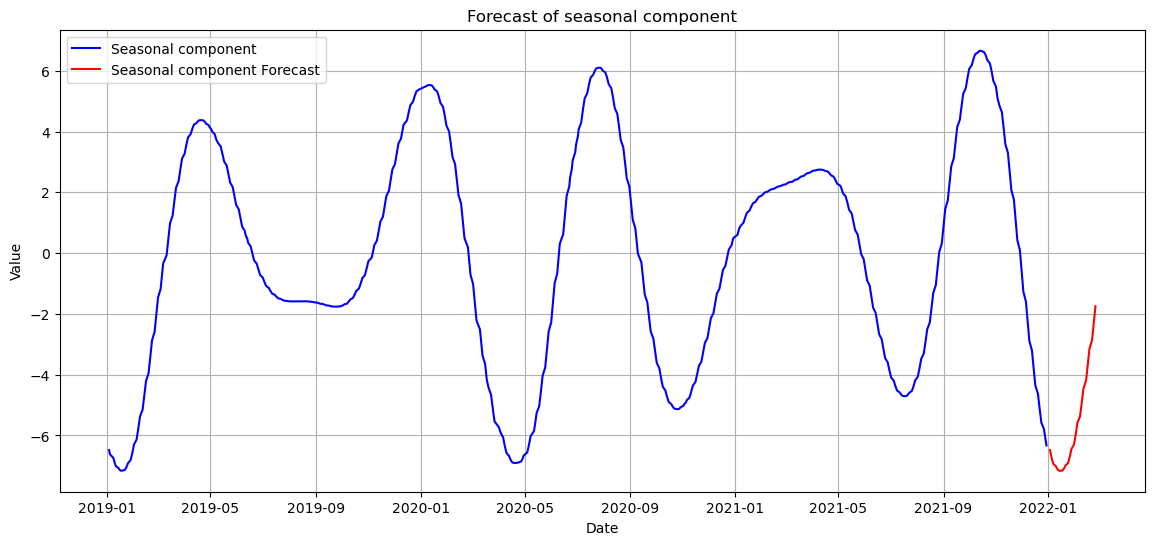

In [86]:
t_future = np.arange(len(future_dates))
future_sin_cos = np.column_stack([
    np.sin(2 * np.pi * t_future / P1), np.cos(2 * np.pi * t_future / P1),
    np.sin(2 * np.pi * t_future / P2), np.cos(2 * np.pi * t_future / P2),
    np.sin(2 * np.pi * t_future / P3), np.cos(2 * np.pi * t_future / P3),
    np.sin(2 * np.pi * t_future / P4), np.cos(2 * np.pi * t_future / P4),
])

future_seasonality_smth = cycles_smth.predict(future_sin_cos)

forecast_df_season_smth = pd.DataFrame({
    'дата': future_dates,
    'forecast': future_seasonality_smth[-len(future_dates):]
})

plt.figure(figsize=(14, 6))

plt.plot(sorted_data['дата'], model_cycles_smth, label='Seasonal component', color='blue')
plt.plot(forecast_df_season_smth['дата'], forecast_df_season_smth['forecast'], label='Seasonal component Forecast', color='red')
plt.title('Forecast of seasonal component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

## Прогноз тренда для несглаженного ряда

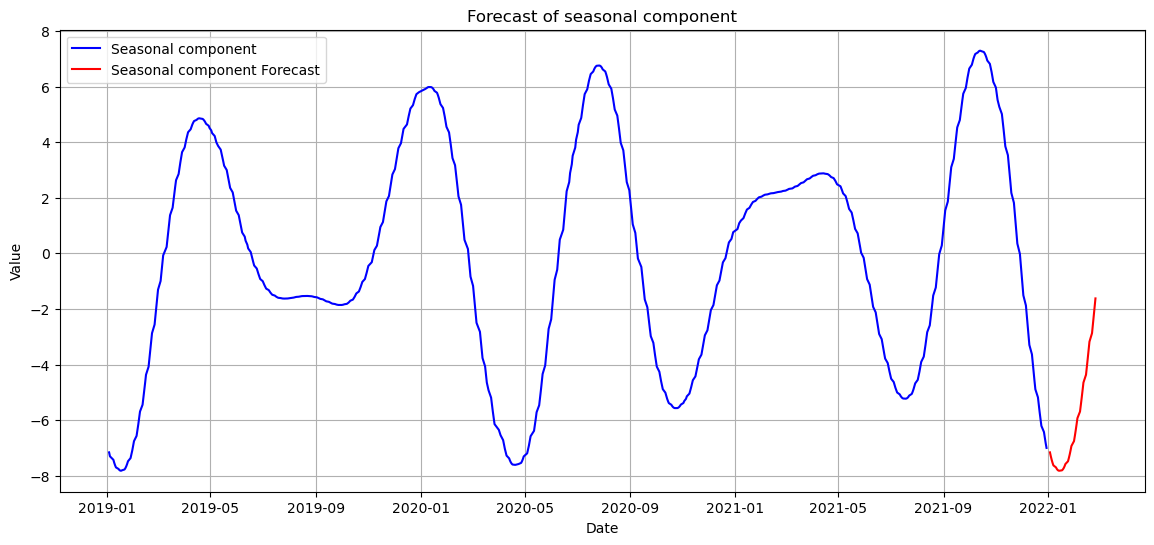

In [89]:
future_seasonality = cycles.predict(future_sin_cos)

forecast_df_season = pd.DataFrame({
    'дата': future_dates,
    'forecast': future_seasonality[-len(future_dates):]
})

plt.figure(figsize=(14, 6))

plt.plot(sorted_data['дата'], model_cycles, label='Seasonal component', color='blue')
plt.plot(forecast_df_season['дата'], forecast_df_season['forecast'], label='Seasonal component Forecast', color='red')
plt.title('Forecast of seasonal component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

## ARIMA для сглаженного ряда

In [92]:
from pmdarima import auto_arima

# Автоматический подбор параметров ARIMA
model = auto_arima(data_without_trend_and_cycles_smth,
                   max_p=5, max_q=5, m=1,
                   seasonal=False,
                   d=0, D=0, trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=275.815, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3971.234, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=323.469, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=236.987, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=342.678, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=286.589, Time=0.35 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=306.562, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=236.273, Time=0.45 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=246.409, Time=0.54 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=205.763, Time=0.42 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=229.357, Time=0.41 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=151.388, Time=0.

C:\Users\Arthas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


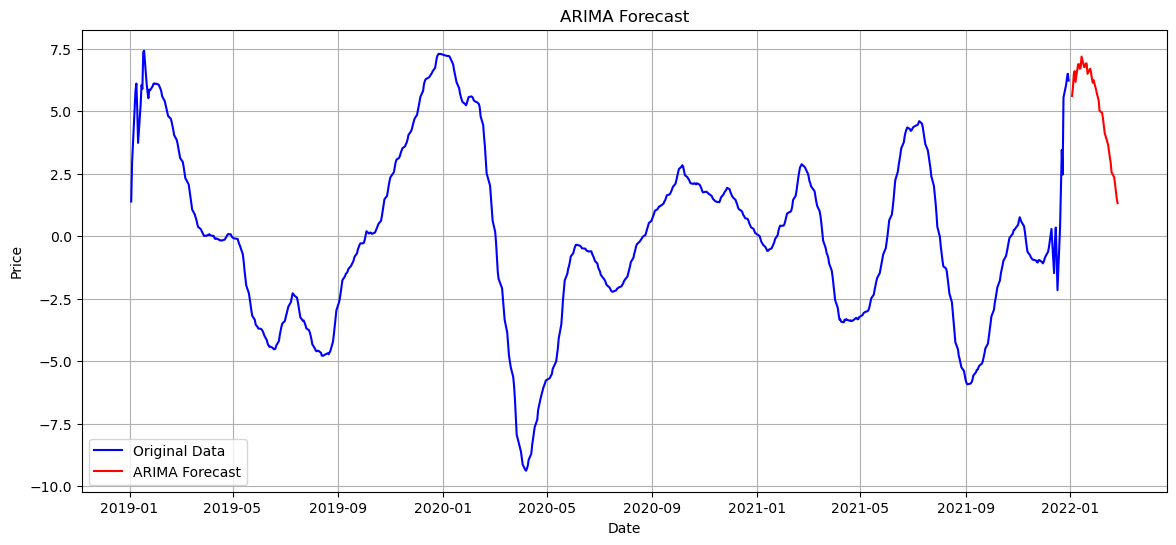

In [93]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(data_without_trend_and_cycles_smth, order=(5, 0, 4))
model_arima_fit = model_arima.fit()

forecast_arima_smth = model_arima_fit.forecast(steps=len(future_dates))

plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], data_without_trend_and_cycles_smth, label='Original Data', color='blue')
plt.plot(future_dates, forecast_arima_smth.values, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

## ARIMA для несглаженного ряда

In [95]:
model = auto_arima(data_without_trend_and_cycles,
                   max_p=5, max_q=5,
                   seasonal=False,
                   d=0, D=0, trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2611.078, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4324.962, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2606.362, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3595.136, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2607.421, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2607.460, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2609.256, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2608.309, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.504 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  749
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1301.181
Date:                Sun, 13 Oct 2024   AIC                           2606.362
Time:                        23:54:2

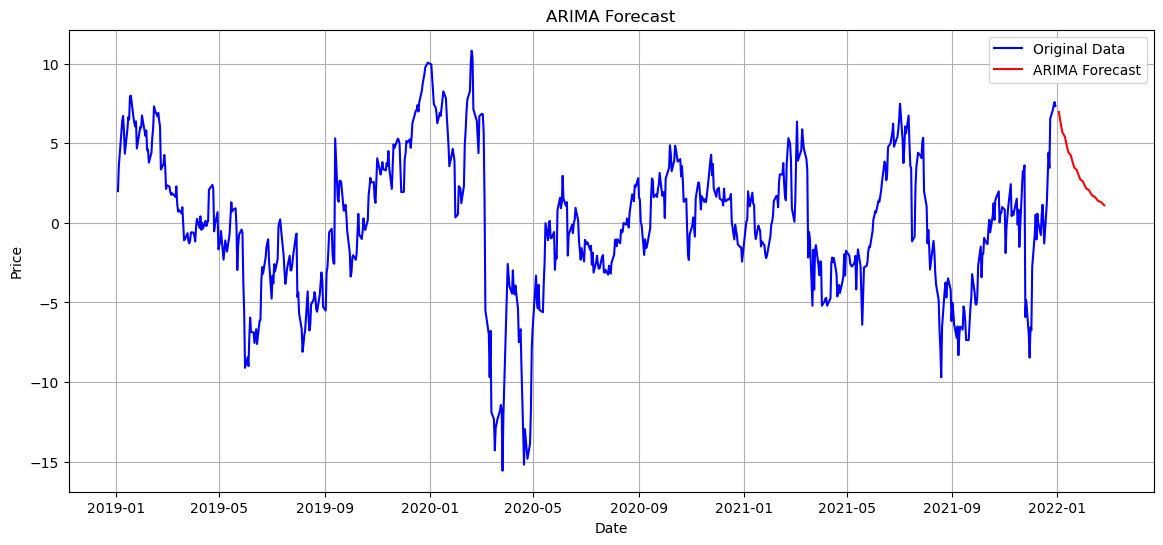

In [96]:
model_arima = ARIMA(data_without_trend_and_cycles, order=(1, 0, 0))
model_arima_fit = model_arima.fit()

forecast_arima = model_arima_fit.forecast(steps=len(future_dates))

plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], data_without_trend_and_cycles, label='Original Data', color='blue')
plt.plot(future_dates, forecast_arima.values, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

## SARIMA для несглаженного ряда

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[4]             : AIC=inf, Time=1.43 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=3155.443, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=2936.008, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.51 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=3156.903, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=2847.226, Time=0.08 sec
 ARIMA(1,1,0)(2,1,1)[4]             : AIC=inf, Time=0.85 sec
 ARIMA(1,1,0)(1,1,1)[4]             : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(2,1,0)[4]             : AIC=2845.289, Time=0.06 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=2934.094, Time=0.03 sec
 ARIMA(0,1,0)(2,1,1)[4]             : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,1)(2,1,0)[4]             : AIC=2847.228, Time=0.08 sec
 ARIMA(1,1,1)(2,1,0)[4]             : AIC=2849.200, Time=0.21 sec
 ARIMA(0,1,0)(2,1,0)[4] intercept   : AIC=2847.289, Time=0.16 s

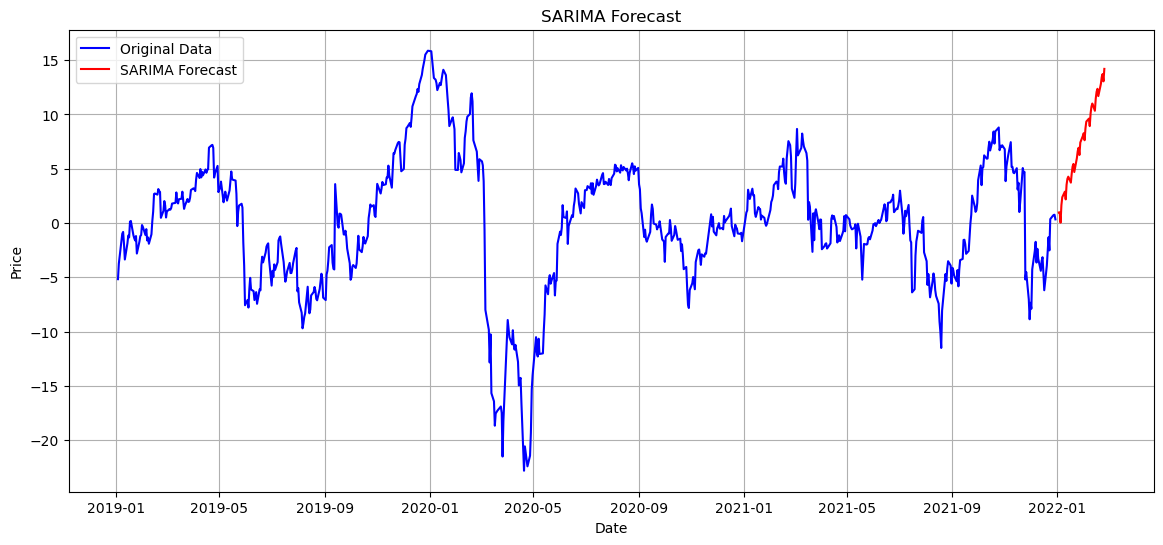

In [107]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = auto_arima(data_without_trend, 
                      seasonal=True,  # Учитываем сезонность
                      m=4,           # Период сезонности (например, 12 месяцев для годовой сезонности)
                      stepwise=True,  # Используем пошаговый поиск
                      trace=True,     # Выводить прогресс
                      suppress_warnings=True,  # Подавлять предупреждения
                      max_p=3, max_q=3, max_P=2, max_Q=2,  # Ограничения на поиск
                      d=1, D=1,       # Дифференцирование
                      )

print(f"Лучшие параметры SARIMA: {model.order} x {model.seasonal_order}")

model_fit = SARIMAX(data_without_trend, 
                    order=model.order, 
                    seasonal_order=model.seasonal_order).fit()

forecast_sarima = model_fit.get_forecast(steps=len(future_dates)).predicted_mean

plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], data_without_trend, label='Original Data', color='blue')
plt.plot(future_dates, forecast_sarima.values, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

## SARIMA для сглаженного ряда

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[4]             : AIC=207.482, Time=0.80 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=428.481, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=233.674, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=239.071, Time=0.10 sec
 ARIMA(2,1,2)(0,1,1)[4]             : AIC=205.489, Time=0.53 sec
 ARIMA(2,1,2)(0,1,0)[4]             : AIC=335.347, Time=0.39 sec
 ARIMA(2,1,2)(0,1,2)[4]             : AIC=207.484, Time=0.69 sec
 ARIMA(2,1,2)(1,1,0)[4]             : AIC=216.040, Time=0.40 sec
 ARIMA(2,1,2)(1,1,2)[4]             : AIC=199.101, Time=0.94 sec
 ARIMA(2,1,2)(2,1,2)[4]             : AIC=inf, Time=1.49 sec
 ARIMA(2,1,2)(2,1,1)[4]             : AIC=214.413, Time=0.93 sec
 ARIMA(1,1,2)(1,1,2)[4]             : AIC=201.231, Time=1.02 sec
 ARIMA(2,1,1)(1,1,2)[4]             : AIC=204.398, Time=1.11 sec
 ARIMA(3,1,2)(1,1,2)[4]             : AIC=194.218, Time=1.15 sec
 ARIMA(3,1,2)(0,1,2)[4]             : AIC=209.353, 

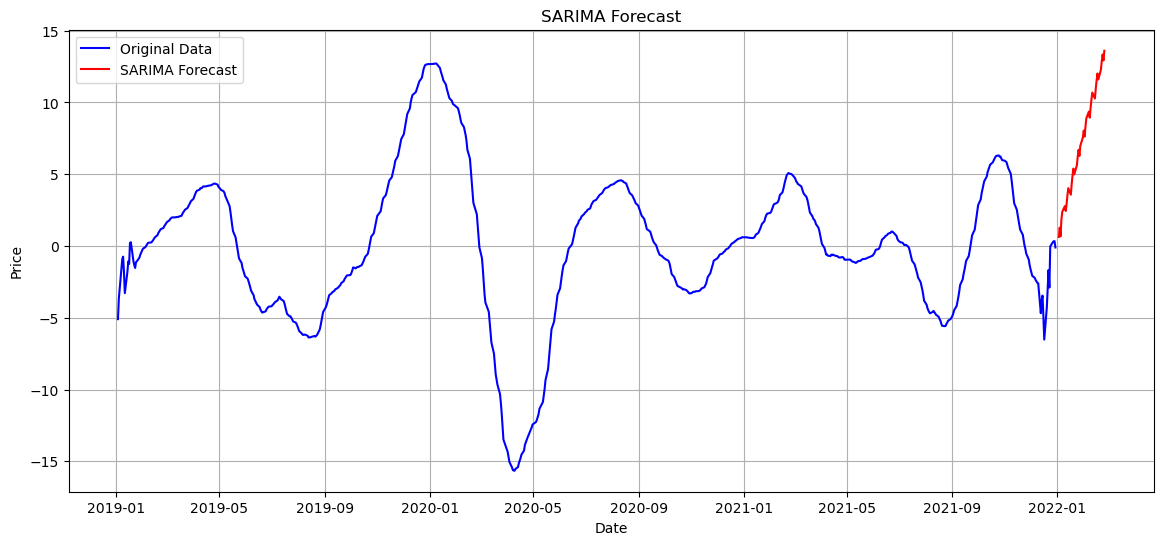

In [108]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = auto_arima(data_without_trend_smth, 
                      seasonal=True,  # Учитываем сезонность
                      m=4,           # Период сезонности
                      stepwise=True,  # Используем пошаговый поиск
                      trace=True,     # Выводить прогресс
                      suppress_warnings=True,  # Подавлять предупреждения
                      max_p=3, max_q=3, max_P=2, max_Q=2,  # Ограничения на поиск
                      d=1, D=1)       # Дифференцирование

print(f"Лучшие параметры SARIMA: {model.order} x {model.seasonal_order}")

model_fit = SARIMAX(data_without_trend_smth, 
                    #order=model.order, 
                    order = (0,1,0),
                    seasonal_order=(2, 1, 0, 4),
                    #seasonal_order = model.seasonal_order
                    ).fit()

forecast_sarima_smth = model_fit.get_forecast(steps=len(future_dates)).predicted_mean

plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], data_without_trend_smth, label='Original Data', color='blue')
plt.plot(future_dates, forecast_sarima_smth.values, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

## Итоговый прогноз

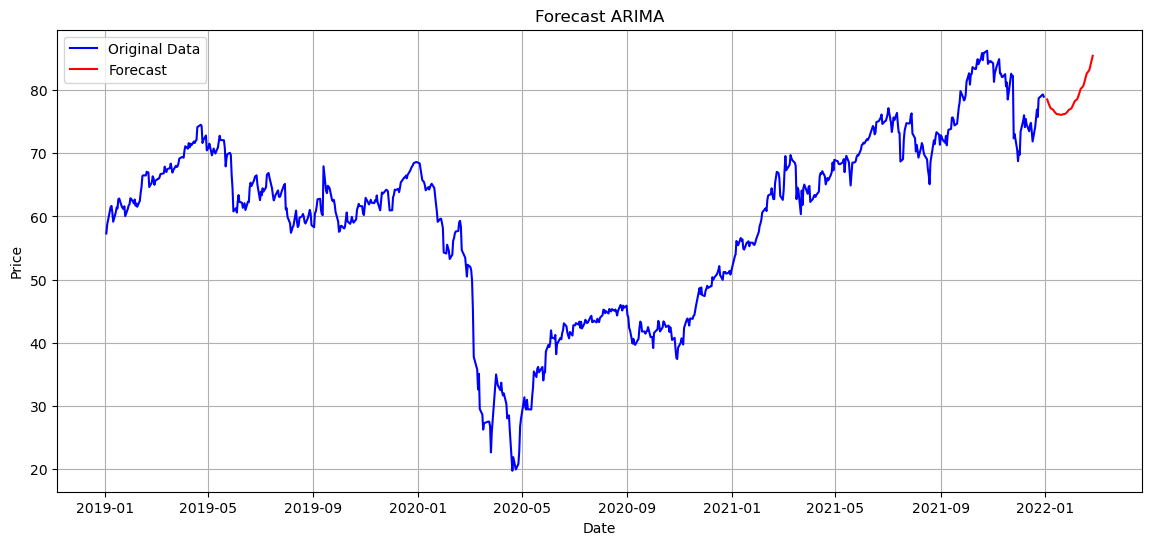

In [111]:
final_forecast_arima = forecast_arima.values + forecast_df_season['forecast'] + forecast_df_trend['forecast']

plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], sorted_data['выход'], label='Original Data', color='blue')
plt.plot(future_dates, final_forecast_arima, label='Forecast', color='red')
plt.title('Forecast ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()


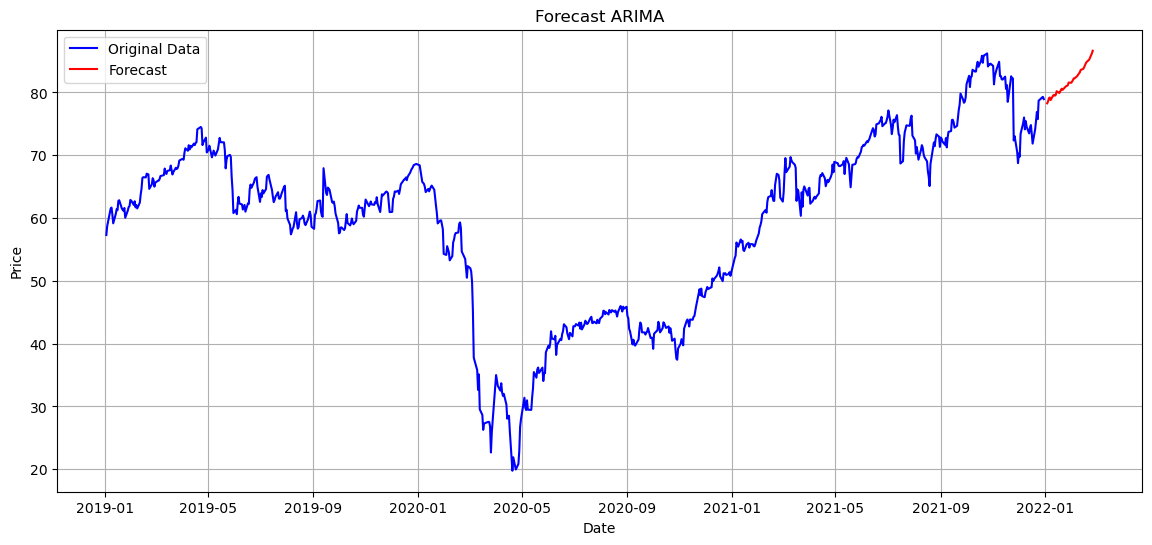

In [112]:
final_forecast_arima_smth = forecast_arima_smth.values + forecast_df_season_smth['forecast'] + forecast_df_trend_smth['forecast']

plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], sorted_data['выход'], label='Original Data', color='blue')
plt.plot(future_dates, final_forecast_arima_smth, label='Forecast', color='red')
plt.title('Forecast ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()


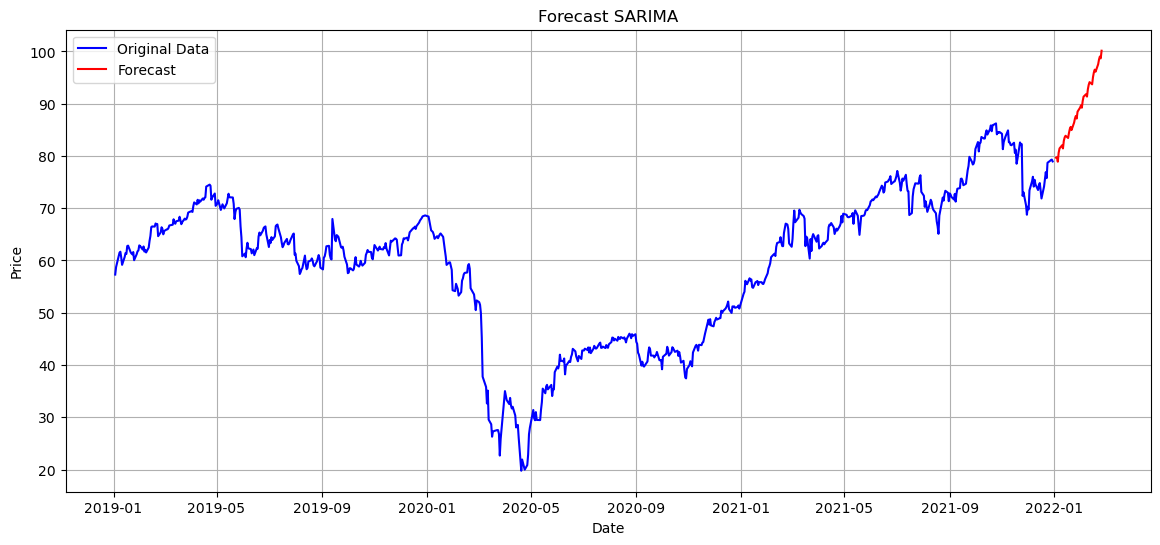

In [113]:
final_forecast_sarima = forecast_sarima.values + forecast_df_trend['forecast']

plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], sorted_data['выход'], label='Original Data', color='blue')
plt.plot(future_dates, final_forecast_sarima, label='Forecast', color='red')
plt.title('Forecast SARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

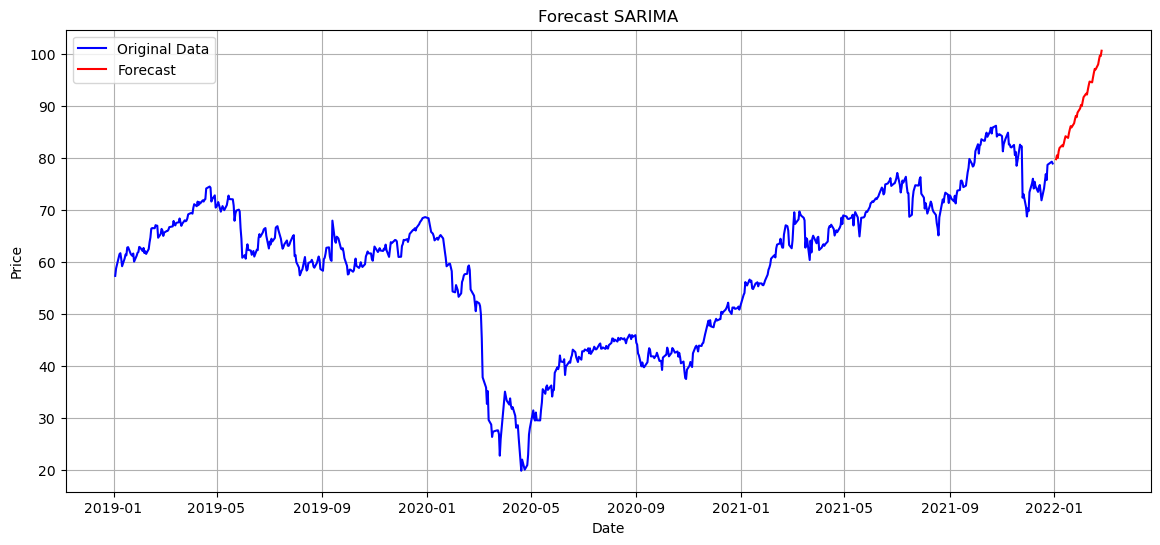

In [114]:
final_forecast_sarima_smth = forecast_sarima_smth.values + forecast_df_trend_smth['forecast']

plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], sorted_data['выход'], label='Original Data', color='blue')
plt.plot(future_dates, final_forecast_sarima_smth, label='Forecast', color='red')
plt.title('Forecast SARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()


# Прогноз с помощью моделей Propthet

In [116]:
from prophet import Prophet

# Подготовка исторических данных для Prophet
df_prophet = pd.DataFrame({
    'ds': sorted_data['дата'],  # Столбец с датами
    'y': sorted_data['выход']   # Целевая переменная
})

# Создание модели Prophet
model_prophet = Prophet(changepoint_prior_scale = 0.07, changepoint_range = 0.6, seasonality_prior_scale = 10, yearly_seasonality = True, n_changepoints = 90)
model_prophet.fit(df_prophet)

forecast_prophet = model_prophet.predict(df_prophet)

future = model_prophet.make_future_dataframe(periods=len(future_dates))
forecast = model_prophet.predict(future)

23:56:21 - cmdstanpy - INFO - Chain [1] start processing
23:56:22 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
# Прогноз на исторический период (без будущего)
forecast_prophet = model_prophet.predict(df_prophet)

forecast_prophet

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-03,58.825061,54.203069,62.316677,58.825061,58.825061,-0.460002,-0.460002,-0.460002,0.201546,0.201546,0.201546,-0.661548,-0.661548,-0.661548,0.0,0.0,0.0,58.365058
1,2019-01-04,58.905671,54.258424,62.982727,58.905671,58.905671,-0.235292,-0.235292,-0.235292,0.127979,0.127979,0.127979,-0.363270,-0.363270,-0.363270,0.0,0.0,0.0,58.670379
2,2019-01-08,59.228112,55.922162,64.413620,59.228112,59.228112,0.835818,0.835818,0.835818,0.186535,0.186535,0.186535,0.649284,0.649284,0.649284,0.0,0.0,0.0,60.063930
3,2019-01-09,59.308722,56.305072,64.215022,59.308722,59.308722,1.122835,1.122835,1.122835,0.276523,0.276523,0.276523,0.846311,0.846311,0.846311,0.0,0.0,0.0,60.431557
4,2019-01-10,59.389332,56.446492,64.944248,59.389332,59.389332,1.219086,1.219086,1.219086,0.201546,0.201546,0.201546,1.017540,1.017540,1.017540,0.0,0.0,0.0,60.608418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,2021-12-24,86.162580,78.386579,86.729053,86.162580,86.162580,-3.694084,-3.694084,-3.694084,0.127979,0.127979,0.127979,-3.822063,-3.822063,-3.822063,0.0,0.0,0.0,82.468496
745,2021-12-27,86.428895,79.349630,88.053348,86.428895,86.428895,-2.688347,-2.688347,-2.688347,0.183467,0.183467,0.183467,-2.871814,-2.871814,-2.871814,0.0,0.0,0.0,83.740548
746,2021-12-28,86.517666,79.966542,88.422797,86.517666,86.517666,-2.354268,-2.354268,-2.354268,0.186535,0.186535,0.186535,-2.540802,-2.540802,-2.540802,0.0,0.0,0.0,84.163398
747,2021-12-29,86.606438,80.646067,89.003900,86.606438,86.606438,-1.930190,-1.930190,-1.930190,0.276523,0.276523,0.276523,-2.206713,-2.206713,-2.206713,0.0,0.0,0.0,84.676248


## Тренд

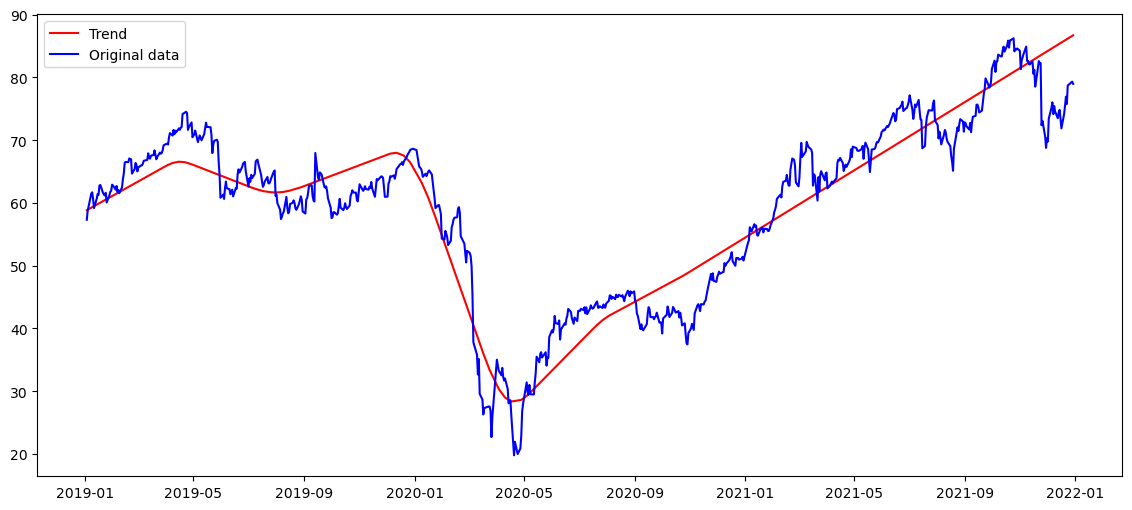

In [88]:
plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], forecast_prophet['trend'], label='Trend', color='red')
plt.plot(sorted_data['дата'], sorted_data['выход'], label='Original data', color='blue')
plt.legend()

## Сезонность

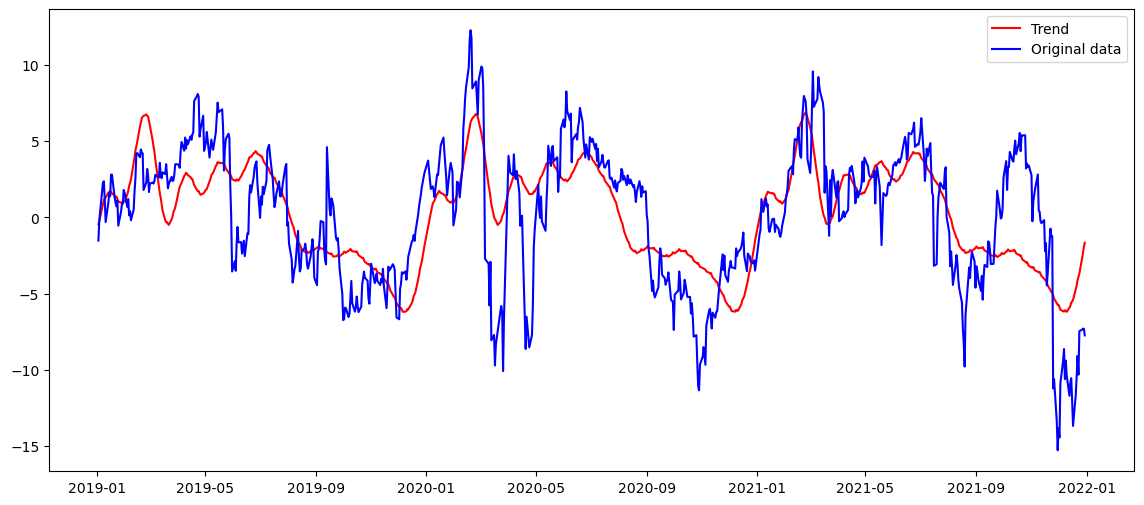

In [90]:
# Суммируем сезонные компоненты
seasonal = forecast_prophet['weekly'] + forecast_prophet['yearly']
data_without_trend_2 = sorted_data['выход'] - forecast_prophet['trend']

plt.figure(figsize=(14, 6))
plt.plot(sorted_data['дата'], seasonal, label='Trend', color='red')
plt.plot(sorted_data['дата'], data_without_trend_2, label='Original data', color='blue')
plt.legend()

In [91]:
future = model_prophet.make_future_dataframe(periods=len(future_dates))
forecast = model_prophet.predict(future)

In [92]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-03,58.825061,54.344711,62.525428,58.825061,58.825061,-0.460002,-0.460002,-0.460002,0.201546,0.201546,0.201546,-0.661548,-0.661548,-0.661548,0.0,0.0,0.0,58.365058
1,2019-01-04,58.905671,54.695181,62.747327,58.905671,58.905671,-0.235292,-0.235292,-0.235292,0.127979,0.127979,0.127979,-0.363270,-0.363270,-0.363270,0.0,0.0,0.0,58.670379
2,2019-01-08,59.228112,55.813792,64.132691,59.228112,59.228112,0.835818,0.835818,0.835818,0.186535,0.186535,0.186535,0.649284,0.649284,0.649284,0.0,0.0,0.0,60.063930
3,2019-01-09,59.308722,56.163431,64.382329,59.308722,59.308722,1.122835,1.122835,1.122835,0.276523,0.276523,0.276523,0.846311,0.846311,0.846311,0.0,0.0,0.0,60.431557
4,2019-01-10,59.389332,56.577890,64.705988,59.389332,59.389332,1.219086,1.219086,1.219086,0.201546,0.201546,0.201546,1.017540,1.017540,1.017540,0.0,0.0,0.0,60.608418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,2022-02-04,89.890985,87.291964,95.729475,89.043404,90.640604,1.507606,1.507606,1.507606,0.127979,0.127979,0.127979,1.379628,1.379628,1.379628,0.0,0.0,0.0,91.398592
785,2022-02-05,89.979757,87.595248,95.656151,89.104872,90.760620,1.603186,1.603186,1.603186,0.004221,0.004221,0.004221,1.598965,1.598965,1.598965,0.0,0.0,0.0,91.582943
786,2022-02-06,90.068529,86.976424,95.176142,89.158295,90.882922,0.869615,0.869615,0.869615,-0.980270,-0.980270,-0.980270,1.849885,1.849885,1.849885,0.0,0.0,0.0,90.938144
787,2022-02-07,90.157300,88.082725,96.425344,89.200938,91.011057,2.313486,2.313486,2.313486,0.183467,0.183467,0.183467,2.130019,2.130019,2.130019,0.0,0.0,0.0,92.470786


In [93]:
forecast[['ds' ,'yhat']][789-40:]

,ds,yhat
749,2021-12-31,85.371961
750,2022-01-01,85.664027
751,2022-01-02,85.087366
752,2022-01-03,86.648103
753,2022-01-04,87.034563
754,2022-01-05,87.491676
755,2022-01-06,87.765053
756,2022-01-07,88.018787
757,2022-01-08,88.199262
758,2022-01-09,87.494239


# Сравнение прогнозов SARIMA и Propthet

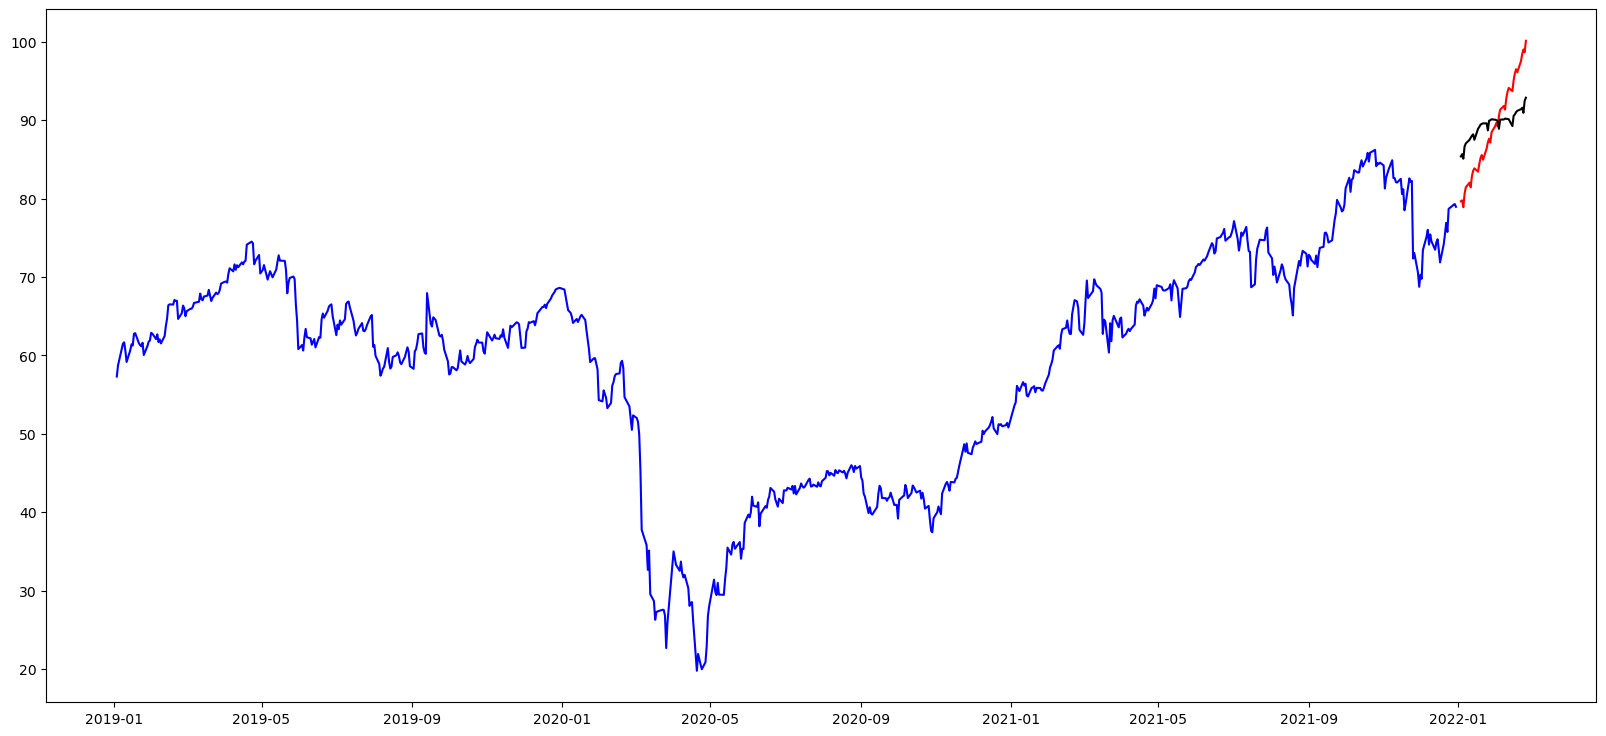

In [168]:
plt.figure(figsize=(20, 9))
plt.plot(sorted_data['дата'], sorted_data['выход'], label='Original Data', color='blue')
plt.plot(future_dates, final_forecast_sarima, label='Forecast', color='red')
plt.plot(future_dates, forecast[['yhat']][789-40:], label='Forecast', color='black')

## Выбор модели для прогноза - SARIMA на сглаженных данных

# Решение задачи классификации

In [232]:
from sklearn.model_selection import train_test_split

# Новые признаки для исходныого ряда
sorted_data['price_diff'] = sorted_data['выход'].diff()  # Изменение цены
sorted_data['price_diff_percent'] = sorted_data['выход'].pct_change()  # Процентное изменение цены
sorted_data['rolling_mean_5'] = sorted_data['выход'].rolling(window=5).mean()  # Скользящее среднее на 5 шагов
sorted_data['rolling_std_5'] = sorted_data['выход'].rolling(window=5).std()  # Скользящее стандартное отклонение

# Убираем строки с NaN
sorted_data = sorted_data.dropna()

# бинарные метки для целевой переменной
sorted_data['direction_label'] = sorted_data['направление'].apply(lambda x: 1 if x == 'л' else 0)

X = sorted_data[['price_diff', 'price_diff_percent', 'rolling_mean_5', 'rolling_std_5']]
y = sorted_data['direction_label']

# (80% на обучение, 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [234]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

param_grid_rf = {
    'n_estimators': [10, 20, 50, 80],  # Уменьшили количество деревьев
    'max_depth': [None, 10, 20],  # Ограничиваем глубину деревьев
    'min_samples_split': [2, 5],  # Разбиение узлов
    'min_samples_leaf': [1, 2],  # Минимальное количество листьев
    'bootstrap': [True]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')

grid_search_rf.fit(X_train, y_train)

print("Лучшие параметры для Random Forest:", grid_search_rf.best_params_)

# Прогноз на тестовой выборке с моделью с наилучшими параметрами
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

f1_rf = f1_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print(f"Random Forest - F1 Score: {f1_rf:.4f}, Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}")

Лучшие параметры для Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}
Random Forest - F1 Score: 0.5402, Accuracy: 0.4521, Precision: 0.4653, Recall: 0.6438


In [244]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  # Скорость обучения
    'n_estimators': [10, 20, 50, 100],  # Количество деревьев
    'max_depth': [1, 3, 5],  # Максимальная глубина деревьев
    'min_child_weight': [1, 3, 5],  # Минимальное количество образцов в листе
    'gamma': [0, 0.1, 0.2],  # Минимальная потеря для разбиения узла
    'subsample': [0.6, 0.8, 1.0],  # Доля данных для каждого дерева
    'colsample_bytree': [0.6, 0.8, 1.0]  # Доля признаков для каждого дерева
}

grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), 
                               param_grid_xgb, cv=5, scoring='accuracy')

grid_search_xgb.fit(X_train, y_train)

print("Лучшие параметры для XGBoost:", grid_search_xgb.best_params_)

# Прогноз на тестовой выборке с моделью с наилучшими параметрами
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

f1_xgb = f1_score(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)

print(f"XGBoost - F1 Score: {f1_xgb:.4f}, Accuracy: {accuracy_xgb:.4f}, Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}")


Лучшие параметры для XGBoost: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}
XGBoost - F1 Score: 0.6410, Accuracy: 0.6164, Precision: 0.6024, Recall: 0.6849


In [252]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Регуляризация
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Алгоритмы оптимизации
    'penalty': ['l2'],  # Тип регуляризации
    'max_iter': [100, 200, 300]  # Количество итераций
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Лучшие параметры для Logistic Regression:", grid_search.best_params_)

best_lr_model = grid_search.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)

# Оценка качества модели с наилучшими параметрами
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

f1_lr = f1_score(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

print(f"Logistic Regression - F1 Score: {f1_lr:.4f}, Accuracy: {accuracy_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}")

Лучшие параметры для Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression - F1 Score: 0.6824, Accuracy: 0.6301, Precision: 0.5979, Recall: 0.7945


In [246]:
from catboost import CatBoostClassifier

param_grid_cb = {
    'iterations': [5, 10, 20, 40],  # Количество деревьев
    'depth': [2, 3, 5, 7],  # Глубина деревьев
    'learning_rate': [0.01, 0.1, 0.2],  # Скорость обучения
    'l2_leaf_reg': [1, 3, 5],  # Регуляризация L2
    'border_count': [32, 64, 128],  # Количество разбиений для числовых признаков
    'subsample': [0.6, 0.8, 1.0]  # Доля данных для каждого дерева
}

catboost_model = CatBoostClassifier(silent=True, random_state=42)

grid_search_cb = GridSearchCV(catboost_model, param_grid_cb, cv=5, scoring='accuracy')

grid_search_cb.fit(X_train, y_train)

print("Лучшие параметры для CatBoost:", grid_search_cb.best_params_)

best_cb_model = grid_search_cb.best_estimator_

y_pred_cb = best_cb_model.predict(X_test)

f1_cb = f1_score(y_test, y_pred_cb)
accuracy_cb = accuracy_score(y_test, y_pred_cb)
precision_cb = precision_score(y_test, y_pred_cb)
recall_cb = recall_score(y_test, y_pred_cb)

print(f"CatBoost - F1 Score: {f1_cb:.4f}, Accuracy: {accuracy_cb:.4f}, Precision: {precision_cb:.4f}, Recall: {recall_cb:.4f}")


Лучшие параметры для CatBoost: {'border_count': 128, 'depth': 2, 'iterations': 10, 'l2_leaf_reg': 1, 'learning_rate': 0.2, 'subsample': 0.6}
CatBoost - F1 Score: 0.6625, Accuracy: 0.6301, Precision: 0.6092, Recall: 0.7260


# Лучший результат показала логистическая регрессия

## Прогноз логистической регрессией на будушее

In [254]:
future_df = pd.DataFrame({
    'дата': future_dates,
    'выход': final_forecast_sarima_smth
})

combined_df = pd.concat([sorted_data, future_df], ignore_index=True)

combined_df['price_diff'] = combined_df['выход'].diff()  # Изменение цены
combined_df['price_diff_percent'] = combined_df['выход'].pct_change()  # Процентное изменение цены
combined_df['rolling_mean_5'] = combined_df['выход'].rolling(window=5).mean()  # Скользящее среднее на 5 шагов
combined_df['rolling_std_5'] = combined_df['выход'].rolling(window=5).std()  # Скользящее стандартное отклонение

# Убираем строки с NaN, которые появились из-за diff() и rolling()
combined_df = combined_df.dropna()

# бинарные метки для целевой переменной
combined_df['direction_label'] = combined_df['направление'].apply(lambda x: 1 if x == 'л' else 0)

train_size = len(combined_df) - len(future_dates)
train_data = combined_df.iloc[:train_size]  # Данные для обучения (исходный ряд)
future_data = combined_df.iloc[train_size:]  # Данные для прогноза (будущие даты)

X_train = train_data[['price_diff', 'price_diff_percent', 'rolling_mean_5', 'rolling_std_5']]
y_train = train_data['direction_label']

X_future = future_data[['price_diff', 'price_diff_percent', 'rolling_mean_5', 'rolling_std_5']]

best_log_reg = LogisticRegression(C=0.1, max_iter=100, penalty='l2', solver='liblinear')

best_log_reg.fit(X_train, y_train)

future_direction_predictions = best_log_reg.predict(X_future)

future_df['predicted_direction'] = future_direction_predictions

future_df['predicted_direction'] = future_df['predicted_direction'].apply(lambda x: 'л' if x == 1 else 'ш')

print(future_df[['дата', 'выход', 'predicted_direction']])


         дата       выход predicted_direction
0  2022-01-03   79.773848                   л
1  2022-01-04   80.519887                   л
2  2022-01-05   80.010501                   ш
3  2022-01-06   81.292700                   л
4  2022-01-07   81.938688                   ш
5  2022-01-10   82.446458                   л
6  2022-01-11   82.228699                   л
7  2022-01-12   82.810217                   ш
8  2022-01-13   83.559984                   л
9  2022-01-14   84.198651                   ш
10 2022-01-17   83.879586                   л
11 2022-01-18   84.796863                   л
12 2022-01-19   85.529403                   ш
13 2022-01-20   86.139646                   л
14 2022-01-21   85.894827                   ш
15 2022-01-24   86.695147                   л
16 2022-01-25   87.466459                   ш
17 2022-01-26   88.121127                   ш
18 2022-01-27   87.876404                   л
19 2022-01-28   88.761522                   ш
20 2022-01-31   89.550024         

In [298]:
# Создаем датафрейм с двумя столбцами
df_predictions = pd.DataFrame({
    'forecast_value': final_forecast_sarima_smth,
    'forecast_class': future_direction_predictions
})

# Сохраняем датафрейм в CSV файл
df_predictions.to_csv('predictions.csv', index=False)